<img src="https://avatars.githubusercontent.com/u/61354833" align="left" width="70" height="70">

Code by [TomMakesThings](https://github.com/TomMakesThings/Computational-Intelligence-Genetic-Algorithm)

# **About**

#### **Problem Definition**
This code solves the following multi-objective optimisation problem using the elitist non-dominated sorting genetic algorithm (NSGA-II)

$min\{f_{1}, f_{2}\}$

### $f_{1} = \frac{(\frac{x_{1}}{2})^2 + (\frac{x_{2}}{4})^2 + (x_{3})^2}{3}$

### $f_{2} = \frac{(\frac{x_{1}}{2} - 1)^2 + (\frac{x_{2}}{4} - 1)^2 + (x_{3} - 1)^2}{3}$

For $-4.0 \le x_{1}, x_{2}, x_{3} \le 4.0$

<br>

#### **Implementation**

**Encoding**

The decision variables for each individual ($x_{1}, x_{2}, x_{3}$) are set up for minimization with gray coding. This is an encoding in which adjacent numbers have a single digit differing by 1.

| Binary | Gray Code |
| ------ | --------- |
| 000    | 000       |
| 001    | 001       |
| 010    | 011       |
| 011    | 010       |
| 100    | 110       |
| 101    | 111       |
| 110    | 101       |
| 111    | 100       |

<br>

**Population Initialisation and Evaluation**

A population of 25 individuals is created and each is assigned a random 10-bit string when initialized. They are then evaluated to determine their fitness. First the gray code values are converted to real values within the range $[-4, 4]$ using equation:

$x_{i} = a_{i} + (b_{i} - a_{i}) \times \frac{c_{i}}{2^l - 1}$

<sub>where:</sub>
- <sub>$a_{i}$ is the lower bound $-4$</sub>
- <sub>$b_{i}$ is the upper bound $4$</sub>
- <sub>$c_{i}$ is the integer value of the gray code</sub>
- <sub>l is the length of each gene</sub>

<br>

Then using the decoded values, $f_{1}$ and $f_{2}$ are calculated.

| Individual | $x_{1}$    | $x_{2}$    | $x_{3}$    | $f_{1}$  | $f_{2}$  |
| ---------- | ---------- | ---------- | ---------- | -------- | -------- |
| 1          | 1100000101 | 1110111000 | 1101000010 | 0.371571 | 0.433807 |
| 2          | 1110111000 | 1101001011 | 1110101100 | 1.05772  | 0.319697 |
| ...        | ...        | ...        | ...        | ...      | ...      |
| 24         | 1001111110 | 0110110001 | 0010111100 | 2.78652  | 4.50792  |
| 25         | 0010011011 | 0101100100 | 0000001110 | 5.49692  | 9.91497  |

<br>

Individuals are sorted into fronts using the efficient non-dominated sorting algorithm. First the population is copied, then sorted based on $f_{1}$. If the $f_{1}$ are equal, then sort on $f_{2}$. The first solution is assigned to front 1. All further solutions are compared the current front, starting with front 1. If they are dominated by at least 1 solution in the current front, a new front is created with this individual. Otherwise check the next front. If all fronts are checked, a new front is created containing this individual. 

| Individual | $x_{1}$    | $x_{2}$    | $x_{3}$    | $f_{1}$  | $f_{2}$  | Front |
| ---------- | ---------- | ---------- | ---------- | -------- | -------- | - |
| 1          | 1100000101 | 1110111000 | 1101000010 | 0.371571 | 0.433807 | 1 |
| 2          | 1110111000 | 1101001011 | 1110101100 | 1.05772  | 0.319697 | 1 |
| ...        | ...        | ...        | ...        | ...      | ...      | ... |
| 24         | 1001111110 | 0110110001 | 0010111100 | 2.78652  | 4.50792  | 7 |
| 25         | 0010011011 | 0101100100 | 0000001110 | 5.49692  | 9.91497  | 8 |

<br>

Once the individuals are separated into fronts, the crowding distance for individuals in each front is calculated. Solutions at the end of each front are assigned infinite distance, while those in between are assigned the average side length of its two neighbouring solutions.

| Individual | $x_{1}$    | $x_{2}$    | $x_{3}$    | $f_{1}$  | $f_{2}$  | Front | Crowding Distance |
| ---------- | ---------- | ---------- | ---------- | -------- | -------- | - | -|
| 1          | 1100000101 | 1110111000 | 1101000010 | 0.371571 | 0.433807 | 1 | $\infty$ |
| 2          | 1110111000 | 1101001011 | 1110101100 | 1.05772  | 0.319697 | 1 | 1| 
| ...        | ...        | ...        | ...        | ...      | ...      | ... | ... |
| 24         | 1001111110 | 0110110001 | 0010111100 | 2.78652  | 4.50792  | 7 | $\infty$ |
| 25         | 0010011011 | 0101100100 | 0000001110 | 5.49692  | 9.91497  | 8 | $\infty$ |

<br>

**Mate Selection**

Pairs of parents are selected through binary tournament selection until 25 offspring are produced. For each selected parent, two individuals are randomly selected from the population to compete. An individual is chosen if it dominates the other. If they are in the same front, the individual with the largest crowding distance is selected. If these are also equal, the selected individual is randomly chosen.

<br>

**Crossover and Mutation**

Uniform crossover is applied to parent pairs at a chance of 0.9. If no crossover occurs, parents’ genes are directly transferred to resulting offspring. Mutation is applied to the created offspring at a chance inversely proportionate to the chromosome size, i.e. $p = \frac{1}{L}$.

<br>

**Selection**

Parents and offspring populations are combined and sorted into fronts using non-dominated sorting. Individuals are assigned a crowding distance and individuals within each front are sorted by crowding distance in descending order. Fronts are combined into a list in ascending order, and the top 25 individuals are selected for the next population.

<div markdown="1" align="center">

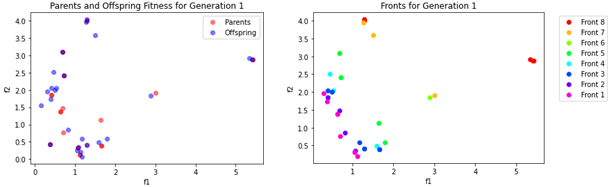

</div>

**Evolution**

The algorithm is run for 30 generations causing the individuals to converge towards the Pareto frontier.  This is the shape formed by the optimal solutions in the objective space. In this case it is convex as this is a minimisation problem. To evaluate performance across generations, hypervolume is calculated using the worst objective values as a reference point. 

<div align="center">

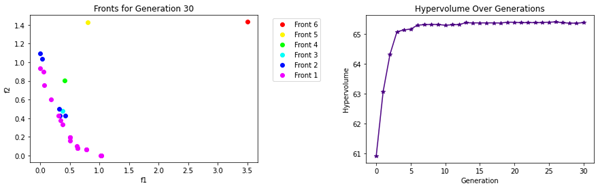

</div>

# **Imports**

In [ ]:
!pip install deap

import array
import random
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm

from deap import base, creator, tools
from deap.benchmarks.tools import hypervolume
from sympy.combinatorics.graycode import random_bitstring, gray_to_bin, bin_to_gray

     |████████████████████████████████| 163kB 6.5MB/s 


# **Constants**

In [ ]:
# Binary length
BITS = 10
# -4.0 <= x1,x2,x3 <= 4.0
LOWER_BOUND, UPPER_BOUND = - 4, 4
# Number of genes (decision variables)
DECISION_VARIABLES = 3

POPULATION_SIZE = 25
NUMBER_OF_GENERATIONS = 30
OFFSPRING_SIZE = 25
CROSS_PROBABILITY = 0.9
MUTATION_PROBABILITY = 1/(BITS * DECISION_VARIABLES)

random.seed(10)

# **Functions**

In [ ]:
def gray_to_real(gray, lower, upper):
  """ Converts between gray coding to a real value in range [lower, upper] """
  l = len(gray)
  # Converts to binary, then integer
  binary = gray_to_bin(gray)
  integer = int(binary, 2)
  # Converts to real-valued
  x = lower + (upper - lower) * (1 / (2**l  - 1)) * integer
  return x

In [ ]:
def evaluation(individual):
  """ Evaluation function """
  # An individual's genes
  g1, g2, g3 = individual[0], individual[1], individual[2]
  # Converts from gray code to real-valued
  x1, x2, x3 = gray_to_real(g1, LOWER_BOUND, UPPER_BOUND), gray_to_real(g2, LOWER_BOUND, UPPER_BOUND), gray_to_real(g3, LOWER_BOUND, UPPER_BOUND)
  f1 = ((x1/2)**2 + (x2/4)**2 + x3**2) / 3
  f2 = (((x1/2) - 1)**2 + ((x2/4) - 1)**2 + (x3 - 1)**2) / 3
  return f1, f2

In [ ]:
def check_dominated(individual, current_front):
  # Compare with individuals in current front starting from last
  for compare_ind in current_front[::-1]:
    if compare_ind.fitness.dominates(individual.fitness):
      return True
  return False

def sequential_search(ind, fronts):
  # Current front to check
  front_index = 0
  while True:
    current_front = fronts[front_index]
    dominated = check_dominated(ind, current_front)
    if not dominated:
      # Adds individual to current front
      fronts[front_index].append(ind)
      return fronts
    front_index += 1
    if front_index + 1 > len(fronts):
      # Add individual to new front
      new_front = [ind]
      fronts.append(new_front)
      return fronts

def efficient_ND_sort(population):
  """ Efficient non-dominated sorting """
  # Copies population to prevent population changing
  copy_population = toolbox.clone(population)
  # Sort population by f1, then by f2 is f1 is equal
  copy_population.sort(key=lambda ind: (ind.fitness.values[0], ind.fitness.values[1]))
  # Assigns best f1 to front 1
  fronts = [[copy_population[0]]]
  copy_population.remove(copy_population[0])
  for ind in copy_population:
    fronts = sequential_search(ind, fronts)
  return fronts

In [ ]:
def assignCrowdingDist(front):
  """ Deap function to assign crowding distance to individuals in a front """
  if len(front) == 0:
    return
  distances = [0.0] * len(front)
  crowd = [(ind.fitness.values, i) for i, ind in enumerate(front)]

  nobj = len(front[0].fitness.values)

  for i in range(nobj):
      crowd.sort(key=lambda element: element[0][i])
      distances[crowd[0][1]] = float("inf")
      distances[crowd[-1][1]] = float("inf")
      if crowd[-1][0][i] == crowd[0][0][i]:
          continue
      norm = nobj * float(crowd[-1][0][i] - crowd[0][0][i])
      for prev, cur, next in zip(crowd[:-2], crowd[1:-1], crowd[2:]):
          distances[cur[1]] += (next[0][i] - prev[0][i]) / norm

  for i, dist in enumerate(distances):
      front[i].fitness.crowding_dist = dist

In [ ]:
def compete(first, second):
  # Comparision based on dominance
  if first.fitness.dominates(second.fitness):
    return first
  elif second.fitness.dominates(first.fitness):
    return second
  # Comparision based on crowding distance
  if first.fitness.crowding_dist > second.fitness.crowding_dist:
    return first
  elif first.fitness.crowding_dist < second.fitness.crowding_dist:
    return second
  # Random selection
  if random.random() <= 0.5:
    return first
  return second

def binaryTournament(population, pair_number):
  """ Binary tournament selection
  Prevents the same individuals being repeatedly selected """
  # Pairs of selected individuals
  selected = []
  # Copies population
  copy_pop = [ind for ind in population]

  # Number of parent pairs
  for i in range(pair_number):
    # Randomly select two individuals
    first = random.choice(copy_pop)
    # Remove from population to prevent repeat selection
    copy_pop.remove(first)
    # Checks if all individuals selected
    if (len(copy_pop) == 0):
      # Adds more individuals for selection
      copy_pop = [ind for ind in population]
    second = random.choice(copy_pop)
    copy_pop.remove(second)
    if (len(copy_pop) == 0):
      copy_pop = [ind for ind in population]
    first_parent = compete(first, second)

    # Randomly select two more individuals
    first = random.choice(copy_pop)
    copy_pop.remove(first)
    if (len(copy_pop) == 0):
      copy_pop = [ind for ind in population]
    second = random.choice(copy_pop)
    if (len(copy_pop) == 0):
      copy_pop = [ind for ind in population]
    copy_pop.remove(second)
    second_parent = compete(first, second)
    selected.append([first_parent, second_parent])
    
  return selected

In [ ]:
def flipMutation(individual, probability=0.1):
  # Iterates through decision variables
  for i in range(len(individual)):
    # Creates updated decision variable
    new_var = ""
    # Iterates through bits in decision variable
    for bit in individual[i]:
      new_bit = bit
      # Flip bit
      if random.random() <= probability:
        if bit == '0':
          new_bit = '1'
        if bit == '1':
          new_bit = '0'
      new_var += new_bit
    # Updates mutated decision variable
    individual[i] = new_var
  return individual

# **Run the Genetic Algorithm**

In [ ]:
# Creates a fitness for minimization of a problem with 2 objectives
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
# Creates class Individual with fitness set for minimization
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Generation function for decision variables using 10 bit gray coding
toolbox.register("gray_code", random_bitstring, BITS)
# Initializers for individual and population
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.gray_code, DECISION_VARIABLES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Genetic operators
toolbox.register("evaluate", evaluation) # Uses evaluation function
toolbox.register("sort", efficient_ND_sort) # Non-dominated sorting into fronts
toolbox.register("crowd", assignCrowdingDist) # Assign crowding distance to each individual of the list
toolbox.register("tournament", binaryTournament) # Tournament selection
toolbox.register("mate", tools.cxUniform, indpb=0.5) # Uniform crossover with 50% chance of exchange
toolbox.register("mutate", flipMutation, probability=MUTATION_PROBABILITY) # Flip mutation with chance = 1 / chromosome length

In [ ]:
def main():
  stats = tools.Statistics()
  logbook = tools.Logbook()
  logbook.header = "generation", "x1", "x2", "x3", "f1", "f2", "front_number", "crowding_distance"

  # Initiate the population
  pop = toolbox.population(POPULATION_SIZE)
  # Hypervolume over generations
  hypervolumes = []

  # Evaluate fitness of population
  invalid_individuals = [ind for ind in pop if not ind.fitness.valid]
  fitnesses = list(map(toolbox.evaluate, pop))
  for ind, fit in zip(invalid_individuals, fitnesses):
    ind.fitness.values = fit

  # Find the worst f1 and f2 values
  copy_pop = toolbox.clone(pop)
  # Sort population by f1 and f2
  copy_pop.sort(key=lambda x: x.fitness.values[0], reverse=True)
  worst_f1 = copy_pop[0].fitness.values[0]
  copy_pop.sort(key=lambda x: x.fitness.values[1], reverse=True)
  worst_f2 = copy_pop[0].fitness.values[1]
  # Sets reference point for hypervolume
  reference = [worst_f1, worst_f2]
  print("Worst f1: " + str(worst_f1))
  print("Worst f2: " + str(worst_f2))
  print("\n")

  # Sort population into fronts
  fronts = toolbox.sort(pop)
  updated_pop = []
  for i in range(len(fronts)):
    front = fronts[i]
    # Assign crowding distance to individuals in each front
    toolbox.crowd(front)
    for ind in front:
      updated_pop.append(ind)
      # Print out individuals and fitness
      logbook.record(generation=0, x1=ind[0], x2=ind[1], x3=ind[2], f1=ind.fitness.values[0], f2=ind.fitness.values[1], front_number=i+1, crowding_distance=ind.fitness.crowding_dist)
      print(logbook.stream)
  print("\n")
  # Updates population so that individuals have crowding distance
  pop = updated_pop

  # Calculates hypervolume of generation 0
  hv = hypervolume(fronts[0], reference)
  hypervolumes.append(hv)

  for generation in range(1, NUMBER_OF_GENERATIONS + 1):
    # Selects parents through tournament selection
    parent_pairs = toolbox.tournament(pop, len(pop))
    parents = []
    offspring = []
    for pair in parent_pairs:
      # Makes copies of parents to modify
      parent1 = toolbox.clone(pair[0])
      parent2 = toolbox.clone(pair[1])
      offspring1 = toolbox.clone(parent1)
      offspring2 = toolbox.clone(parent2)
      # Cross over
      if random.random() <= CROSS_PROBABILITY:
        toolbox.mate(offspring1, offspring2)
      # Mutate both offspring
      toolbox.mutate(offspring1)
      toolbox.mutate(offspring2)
      parents.append(parent1)
      offspring.append(offspring1)
      parents.append(parent2)
      offspring.append(offspring2)
    # Caps to 25 offspring
    offspring = offspring[:OFFSPRING_SIZE]
    parents = parents[:OFFSPRING_SIZE]
  
    # Offspring still have parent's fitness
    parent_f1 = [off.fitness.values[0] for off in offspring]
    parent_f2 = [off.fitness.values[1] for off in offspring]
    # Offspring fitness is updated
    fitnesses = list(map(toolbox.evaluate, offspring))
    for off, fit in zip(offspring, fitnesses):
      off.fitness.values = fit

    # Print graph
    if generation == 1 or generation == NUMBER_OF_GENERATIONS:
      offspring_f1 = [off.fitness.values[0] for off in offspring]
      offspring_f2 = [off.fitness.values[1] for off in offspring]
      # Plot parents and offspring fitness
      plot.figure()
      plot.title('Parents and Offspring Fitness for Generation ' + str(generation))
      plot.plot(parent_f1, parent_f2, 'ro', alpha=0.5, label='Parents')
      plot.plot(offspring_f1, offspring_f2, 'bo', alpha=0.5, label='Offspring')
      plot.xlabel('f1')
      plot.ylabel('f2')
      plot.legend()

    # Combine parents and offspring then sort
    combined_pop = parents + offspring
    fronts = toolbox.sort(combined_pop)
    sorted_pop = []
    for i in range(len(fronts)):
      front = fronts[i]
      # Assign crowding distance to individuals in each front
      toolbox.crowd(front)
      # Sort individual's in front by crowding distance in descending order
      front.sort(key=lambda x: x.fitness.crowding_dist, reverse=True)
      for ind in front:
        # Ensures individual's are unique to improve diversity
        duplicated = False
        for ind2 in sorted_pop:
          if ind == ind2:
            duplicated = True
        if not duplicated:
          sorted_pop.append(ind)
    # Select top individuals
    pop = sorted_pop[:POPULATION_SIZE]

    # Hypervolume using the worst objective values as the reference point
    hv = hypervolume(fronts[0], reference)
    hypervolumes.append(hv)

    # Print graph
    if generation == 1 or generation == NUMBER_OF_GENERATIONS:
      # Worst individuals
      rejected_pop = sorted_pop[POPULATION_SIZE:]
      # Fitness of selected and rejected individuals
      selected_f1 = [ind.fitness.values[0] for ind in pop]
      selected_f2 = [ind.fitness.values[1] for ind in pop]
      rejected_f1 = [ind.fitness.values[0] for ind in rejected_pop]
      rejected_f2 = [ind.fitness.values[1] for ind in rejected_pop]

      # Plot fronts
      plot.figure()
      plot.title('Fronts for Generation ' + str(generation))
      # Iterable rainbow colour map
      colours = iter(cm.hsv(np.linspace(0, 1, len(fronts))))
      for f in range(len(fronts)-1, 0, -1):
        front_f1s = [ind.fitness.values[0] for ind in fronts[f]]
        front_f2s = [ind.fitness.values[1] for ind in fronts[f]]
        plot.plot(front_f1s, front_f2s, 'o', color=next(colours), label='Front ' + str(f))
      plot.xlabel('f1')
      plot.ylabel('f2')
      plot.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

      # Plot parents and offspring fitness
      plot.figure()
      plot.title('Selected Solutions Fitness for Generation ' + str(generation))
      plot.plot(selected_f1, selected_f2, 'o', alpha=0.5, label='Selected')
      plot.plot(rejected_f1, rejected_f2, 'o', alpha=0.5, label='Not selected')
      plot.xlabel('f1')
      plot.ylabel('f2')
      plot.legend()

  # Plot hypervolume over generations
  hvs = np.array(hypervolumes)
  # Makes list of generation numbers same shape as hypervolumes list
  gens = np.zeros_like(hvs)
  for i in range(0, len(gens)):
    gens[i] = i
  plot.figure()
  plot.title('Hypervolume Over Generations')
  plot.plot(gens, hvs, '-*', color='indigo')
  plot.xlabel('Generation')
  plot.ylabel('Hypervolume')
  plot.show()
  
  return pop

Worst f1: 6.620413767798122
Worst f2: 9.914974804010845


generation	x1        	x2        	x3        	f1      	f2      	front_number	crowding_distance
0         	1100000101	1110111000	1101000010	0.371571	0.433807	1           	inf              
0         	1110111000	1101001011	1110101100	1.05772 	0.319697	1           	1                
0         	1011110000	1010000110	1111001011	1.12426 	0.130773	1           	inf              
0         	0100101110	1110000100	0101000111	0.398622	1.85024 	2           	inf              
0         	1010100100	0111000101	0101101101	0.630849	1.37474 	2           	0.491982         
0         	1101100000	0111000001	1111101010	0.699373	0.764215	2           	0.588704         
0         	1100110111	1000010001	1110110110	1.28469 	0.415028	2           	0.508018         
0         	1111100001	1011101000	1110000000	1.65908 	0.393194	2           	inf              
0         	0110000100	0100111000	0111000101	0.686344	3.09723 	3           	inf              
0         	1

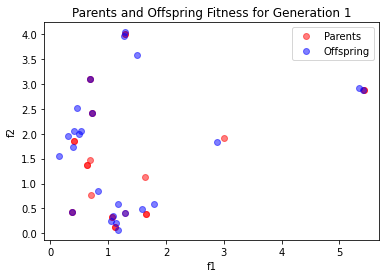

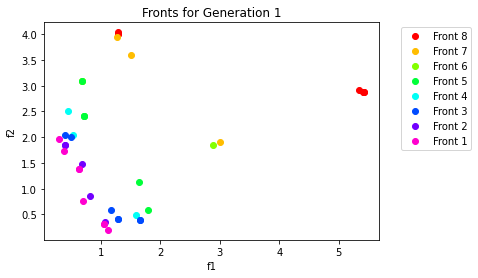

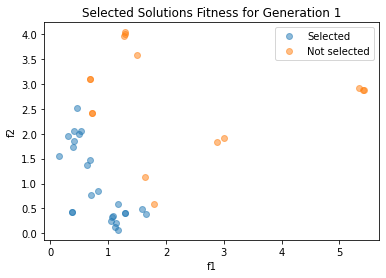

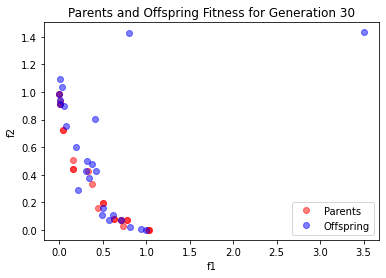

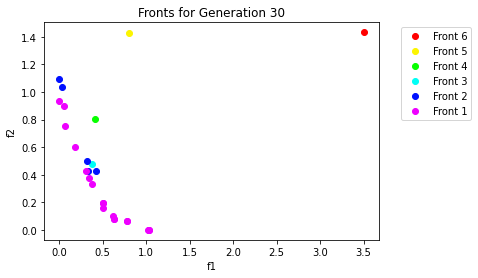

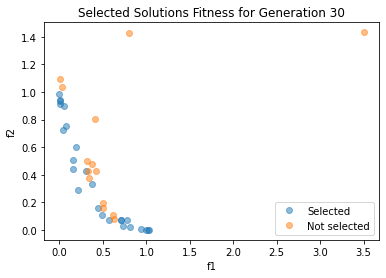

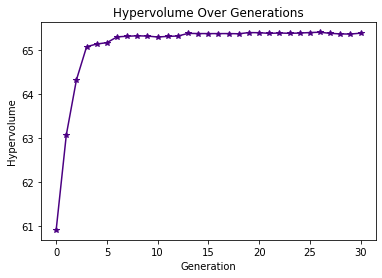

Population: [['1100000001', '1100001100', '1100000000'], ['1110000000', '1000001111', '1111000011'], ['1101010101', '1010011100', '1100100100'], ['1110010000', '1110011000', '1101101101'], ['1100000001', '1110011000', '1101100000'], ['1100100111', '1101001100', '1100000000'], ['1110010000', '1001000101', '1101101011'], ['1110001000', '1000000011', '1101110001'], ['1110101000', '1010011000', '1101110011'], ['1110010000', '1000000011', '1111000011'], ['1100010001', '1100001100', '1100000000'], ['1100010001', '1110011001', '1100100000'], ['1110010000', '1001000101', '1101001110'], ['1110010000', '1010011100', '1111000011'], ['1100011001', '1100001100', '1100000000'], ['1110010010', '1010011100', '1111000011'], ['1100000001', '0100001100', '1100001000'], ['1010001100', '1000000011', '1111000011'], ['1100010000', '1100001100', '1101110001'], ['1100000001', '1110011001', '1100000000'], ['1100010000', '1111011001', '1101001110'], ['1100010000', '1010011000', '1101001110'], ['1010001100', '100

In [ ]:
# Run the genetic algorithm
pop = main()
print("Population: " + str(pop))
print("\n")